In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

In [63]:
df = sns.load_dataset('tips')

In [64]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


## Seaborn 데이터 시각화 : 수치형 x 수치형

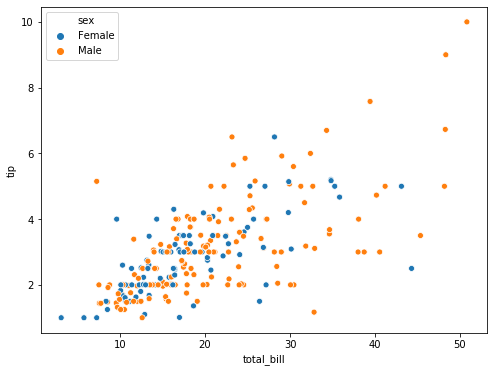

In [66]:
plt.figure(figsize = (8,6))
sns.scatterplot(data = df, x = "total_bill", y = "tip", hue = "sex")

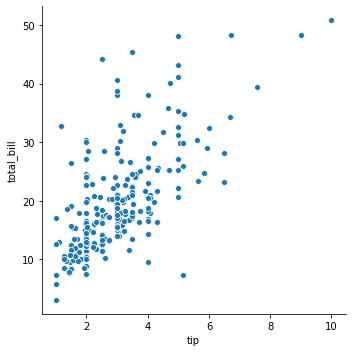

In [67]:
sns.relplot(data = df, x = 'tip', y = 'total_bill')

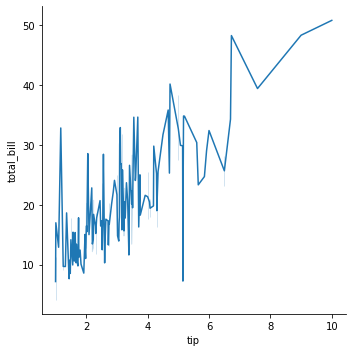

In [12]:
sns.relplot(data = raw, x = 'tip', y = 'total_bill', kind = 'line')

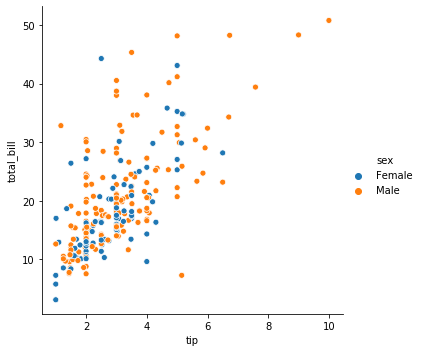

In [68]:
sns.relplot(data = df, x = 'tip', y = 'total_bill', hue = 'sex')

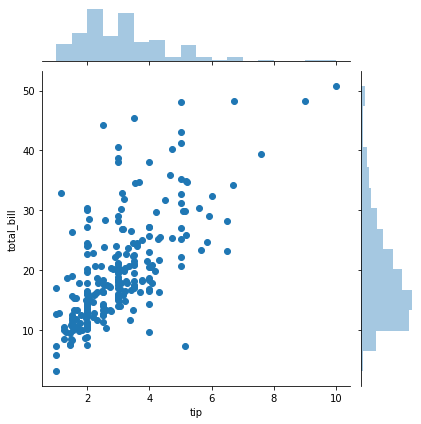

In [69]:
sns.jointplot(data = df, x = "tip", y = "total_bill")

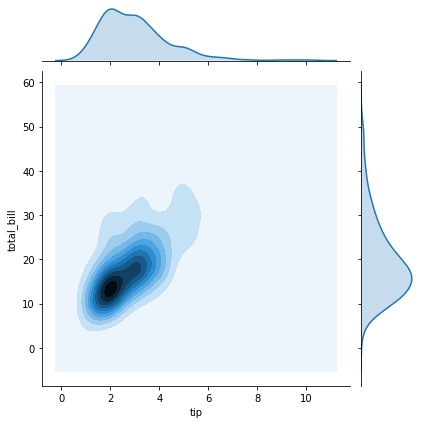

In [70]:
# 두 변수간의 밀도 보기
sns.jointplot(data = df, x = 'tip', y = 'total_bill', kind = 'kde')

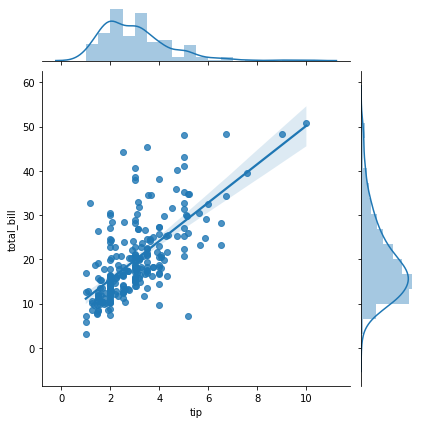

In [18]:
# 두 변수 간의 회기 식 보기 
sns.jointplot(data = raw, x = 'tip', y = 'total_bill', kind = 'regg')

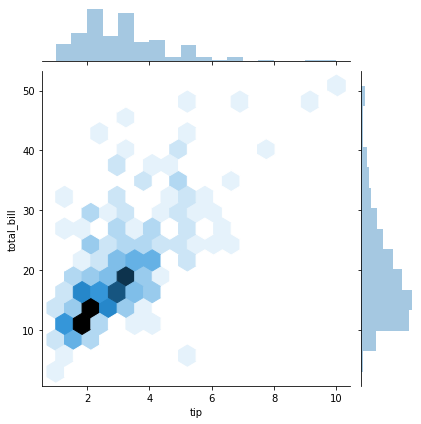

In [71]:
# 동일한 간격으로 색깔만 다르게 밀도를 보는 방식 
sns.jointplot(data = df, x = 'tip', y = 'total_bill', kind = 'hex')

### Pairplot

* df의 모든 수치형데이터 컬럼에서 두 컬럼씩 관계를 시각화 
* 따라서 따로 축 지정을 하지 않는다

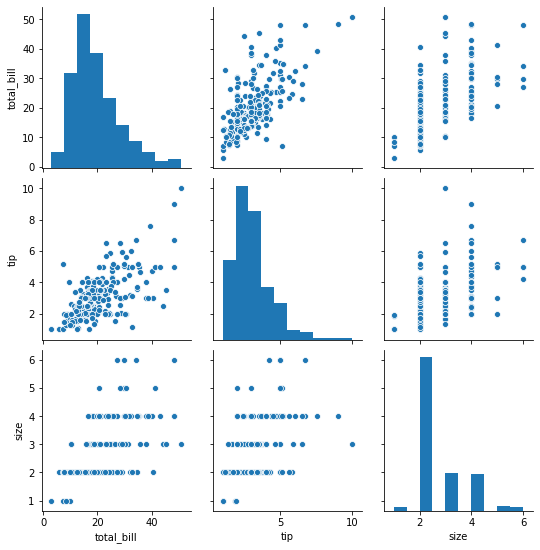

In [72]:
sns.pairplot(data = df)

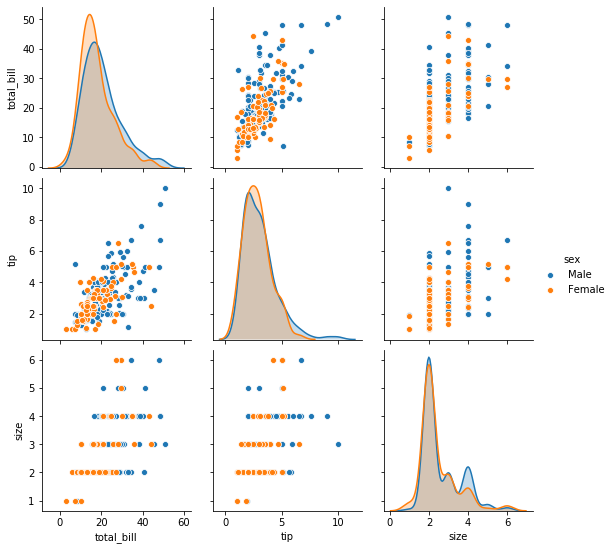

In [21]:
# hue 옵션 사용
sns.pairplot(data = raw, hue = 'sex')

## Seaborn 데이터 시각화 : 수치형 x 카테고리형

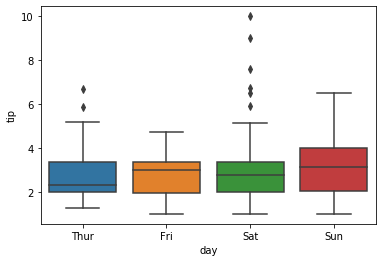

In [73]:
sns.boxplot(data = df, x = 'day', y = 'tip')

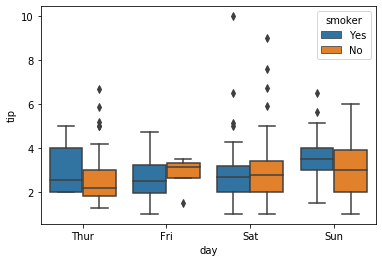

In [74]:
sns.boxplot(data = df, x = "day", y = "tip", hue = 'smoker')

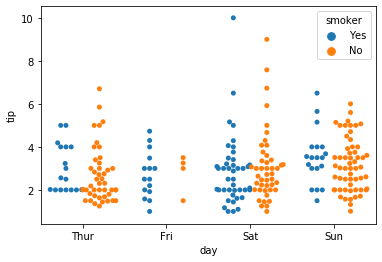

In [76]:
# swarm plot 은 데이터 개수를 표시하지 않는 박스플랏의 한계를 보완
# dodge = True -> hue 가 겹치지 않도록 그려줌 

sns.swarmplot(data = df, x = 'day', y = 'tip', hue = 'smoker', dodge = True)

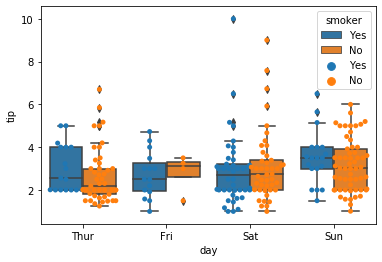

In [77]:
# 두 종류 그래프 겹쳐 그리기
sns.boxplot(data = df, x = "day", y = "tip", hue = 'smoker')
sns.swarmplot(data = df, x = 'day', y = 'tip', hue = 'smoker', dodge = True)

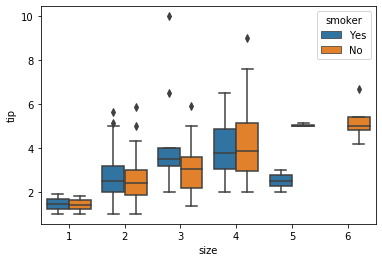

In [78]:
sns.boxplot(data = df, x = 'size', y ="tip", hue = 'smoker')

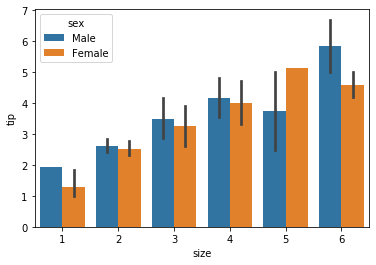

In [80]:
sns.barplot(data = df, x = 'size', y = 'tip', hue = 'sex')

In [82]:
# 히트맵 실행 전 데이터 프레임을 수치형으로만 정리해줘야한다.
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [84]:
df_1 = df.pivot_table(index = "day", columns = "size", values = 'tip', aggfunc = 'mean')
df_1.head()

size,1,2,3,4,5,6
day,,,,,,
Thur,1.83,2.442500,2.692500,4.218000,5.000000,5.3
Fri,1.92,2.644375,3.000000,4.730000,NaN,NaN
Sat,1.00,2.517547,3.797778,4.123846,3.000000,NaN
Sun,NaN,2.816923,3.120667,4.087778,4.046667,5.0


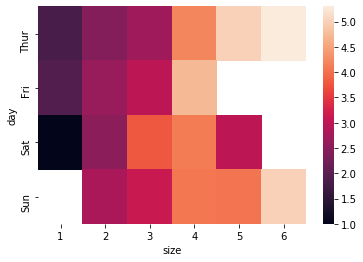

In [85]:
sns.heatmap(df_1)

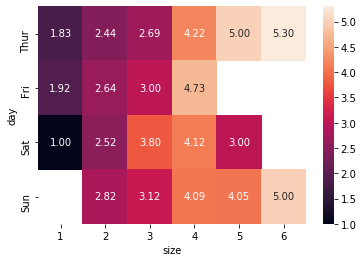

In [87]:
# 데이터 수치 표기, 소수점 둘째자리까지 표기
# fmt = '.0f' : 정수로 표시
# fmt = '.1f' : 소수점 첫째자리까지 표시

sns.heatmap(data = df_1,
           annot = True, fmt = '.2f')

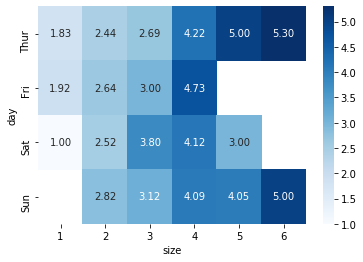

In [92]:
# 색상 조정
sns.heatmap(data = df_1,
           annot = True, fmt = '.2f',
           cmap = 'Blues') # 컬러맵추천 : Reds, vlag, Pastel1, RdBu_r

## folium으로 지도시각화 하기 

In [50]:
import folium

### 지도시각화

* 지도생성하기 : m = folium.Map(location = [위도,경도], zoom_start = 확대정도)
* 정보추가하기
    * 마커주가하기 : folium.Marker([위도, 경도]).add_to(m)
    * 원 추가하기 : folium.CircleMarker([위도, 경도]).radius = 원크기).add_to(m)
    * 추가 옵션 :
        * tooltip = '마우스 올리면 보여질 정보'
        * popup = '클릭하면 보여질 정보'
    * 기타 : ClickForMarker('체크').add_to(m) 지도에서 클릭할 경우 마커 추가하기 

In [52]:
m = folium.Map(location = [37.5536067, 126.9674309], zoom_start = 15)
m

In [57]:
# 마커 추가하기, 툴팁 추가, 클릭 시 팝업 추가
folium.Marker([37.5536067, 126.9674309], 
              tooltip = 'mouseover',
              popup = 'click').add_to(m)
m

In [59]:
# 서클마커 추가, 툴팁 추가 
folium.CircleMarker([37.5536067, 126.9674309],
                   radius = 20,
                   tooltip = 'mouseover').add_to(m)
m

In [61]:
# 미니맵추가
from folium.plugins import MiniMap

m = folium.Map(location = [37.5536067, 126.9674309], zoom_start = 12)

minimap = MiniMap()
minimap.add_to(m)

m

### 서울시 대피소 folium 으로 지도 시각화 

In [93]:
import pandas as pd
import numpy as np


In [28]:
# 서울시 대피소 데이터 가져오기 
raw = pd.read_csv('서울시 대피소 방재시설 현황 (좌표계_ WGS1984).csv', encoding = 'cp949')
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 694 entries, 0 to 693
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   고유번호    694 non-null    int64  
 1   대피소명칭   694 non-null    object 
 2   소재지     694 non-null    object 
 3   최대수용인원  694 non-null    int64  
 4   현재수용인원  694 non-null    int64  
 5   현재운영여부  694 non-null    object 
 6   전화번호    694 non-null    object 
 7   행정동코드   694 non-null    int64  
 8   행정동명칭   694 non-null    object 
 9   대피단계    694 non-null    object 
 10  비고      694 non-null    object 
 11  경도      694 non-null    float64
 12  위도      694 non-null    float64
dtypes: float64(2), int64(4), object(7)
memory usage: 70.6+ KB


In [29]:
raw.head()

,고유번호,대피소명칭,소재지,최대수용인원,현재수용인원,현재운영여부,전화번호,행정동코드,행정동명칭,대피단계,비고,경도,위도
0,2,혜화초등학교,혜화동 13-1 (혜화로 32),450,0,N,763-0606,11110650,혜화동,,,126.999891,37.589128
1,3,새샘교회,홍제동 20-4,100,0,N,720-7040,11410655,홍제2동,,,126.950484,37.583660
2,4,한강중앙교회,포은로2가길 66(합정동),130,0,N,337-6629,11440680,합정동,,,126.910028,37.549343
3,5,서울성산초등학교,양화로3길 94(합정동),200,0,N,324-1407,11440680,합정동,,,126.910666,37.553495
4,6,상도1동경로당,상도동 159-282,20,0,N,010-8011-7330,11590530,상도1동,,,126.948269,37.500395


In [33]:
# 인덱스 0 번의 위도 경도 가지고 오기
lat = raw.iloc[0].위도
long = raw.iloc[0].경도
print(lat, long)

37.5891283 126.9998906


In [34]:
raw.head()

,고유번호,대피소명칭,소재지,최대수용인원,현재수용인원,현재운영여부,전화번호,행정동코드,행정동명칭,대피단계,비고,경도,위도
0,2,혜화초등학교,혜화동 13-1 (혜화로 32),450,0,N,763-0606,11110650,혜화동,,,126.999891,37.589128
1,3,새샘교회,홍제동 20-4,100,0,N,720-7040,11410655,홍제2동,,,126.950484,37.583660
2,4,한강중앙교회,포은로2가길 66(합정동),130,0,N,337-6629,11440680,합정동,,,126.910028,37.549343
3,5,서울성산초등학교,양화로3길 94(합정동),200,0,N,324-1407,11440680,합정동,,,126.910666,37.553495
4,6,상도1동경로당,상도동 159-282,20,0,N,010-8011-7330,11590530,상도1동,,,126.948269,37.500395


In [36]:
name = raw.iloc[0].대피소명칭
print(lat, long, name)

37.5891283 126.9998906 혜화초등학교


In [40]:
# 모든 인덱스에 대한 반복문 
for i in range(693) :

    lat = raw.iloc[i].위도
    long = raw.iloc[i].경도
    name = raw.iloc[i].대피소명칭
    
    print(lat, long, name)

37.5891283 126.9998906 혜화초등학교
37.58366029999999 126.95048440000001 새샘교회
37.5493434 126.91002809999999 한강중앙교회
37.553495299999994 126.9106658 서울성산초등학교
37.500395399999995 126.9482686 상도1동경로당
37.4997347 126.93743229999998 상도초등학교
37.5100544 126.9536402 본동초교
37.5365343 126.9650202 남정초등학교
37.5884354 126.92177849999999 응암초등학교
37.5030252 126.9625144 제일감리교회
37.4866976 126.9576162 봉천종합사회복지관
37.52320770000001 126.93680970000001 여의도초등학교
37.4830902 126.9787764 사당1동주민센터
37.5283727 126.95371019999999 서부성결교회
37.4811316 126.9901108 서울 이수 중학교
37.5459029 126.9535807 서울공덕초등학교
37.4937422 126.9440685 국사봉중학교
37.4910611 126.9553258 봉현초등학교
37.5911343 127.0021399 천주교 외방선교회
37.5484412 127.0628283 성동세무서
37.5147612 127.1130378 방이중학교
37.49982979999999 127.1079155 가락초등학교
37.5444065 127.0629919 성수초교
37.515907299999995 127.08781440000001 잠신초등학교
37.484888 127.0934544 태화기독교종합 사회복지관
37.51723320000001 127.09934399999999 잠실중학교
37.619831700000006 127.0055226 정릉초등학교
37.530351200000005 127.08535230000001 광양중학교
37.5778497999999

37.5002418 126.8281915 구로여자정보산업고등학교
37.5636685 127.0891173 대원외국어고등학교
37.529664000000004 127.14553390000002 선린초등학교
37.5836674 126.9041368 증산중학교
37.524253 126.86710990000002 서정초등학교
37.588561 126.9699284 경기상업고등학교
37.6088175 127.02477340000002 길음 종합사회복지관
37.6235791 127.01216869999999 미양중학교
37.5479867 126.9643143 청파초등학교
37.563263799999994 127.02956280000001 무학초교
37.5392935 127.05253950000001 성원중학교
37.4741646 127.0319136 서울양재초등학교
37.5319441 127.00638880000001 한남교회
37.499813200000006 127.1135969 중대초등학교
37.5813782 127.0140632 명신초등학교
37.5812088 126.9179274 은가경로당
37.5324773 126.9904794 종합행정타운
37.5398266 126.95029840000002 마포삼성@경로당
37.5680782 126.9630729 금화초등학교
37.49235170000001 126.981568 경문고등학교
37.57354 126.96184440000002 대신고등학교
37.5779418 127.0039175 서울사대부속여중
37.4981483 126.85475290000001 오류여자중학교
37.5517511 127.1272382 암사2동 주민센터
37.590258899999995 127.0793691 중목초등학교
37.494293 126.9613115 상현중학교
37.47618189999999 126.915573 미성동주민센터
37.5759123 126.81462509999999 치현초등학교
37.5367143 126.842652399999

In [42]:
raw[raw["대피소명칭"] == "서울역"]

,고유번호,대피소명칭,소재지,최대수용인원,현재수용인원,현재운영여부,전화번호,행정동코드,행정동명칭,대피단계,비고,경도,위도


In [48]:
# 지도생성, 중심위치 : 서울역 [37.5536067, 126.9674309]

import folium
m = folium.Map(location = [37.5536067, 126.9674309], zoom_start = 12)

# 대피소 마커 추가

for i in range(693) :

    lat = raw.iloc[i].위도
    long = raw.iloc[i].경도
    name = raw.iloc[i].대피소명칭
    
    folium.Marker([lat,long], tooltip = name).add_to(m)
    # print(lat, long, name)
    
m

In [49]:
# 지도를  html 로 저장하고 봐야 한글 안깨짐. 저장하기 
m.save('sheltermap.html')

### 클러스터마커를 이용해 그룹으로 마커 표현 (미니맵까지추가)

In [94]:
# 클러스터마커 라이브러리 불러오기 

from folium.plugins import MiniMap
from folium.plugins import MarkerCluster

In [99]:
# 지도생성
m = folium.Map(location = [37.5536067, 126.9674309], zoom_start = 12)

# 클러스터마커 지정
marker_cluster = MarkerCluster().add_to(m)

# 미니맵까지추가 
minimap = MiniMap()
minimap.add_to(m)

# 대피소 마커 추가

for i in range(693) :

    lat = raw.iloc[i].위도
    long = raw.iloc[i].경도
    name = raw.iloc[i].대피소명칭
    
    folium.Marker([lat,long], tooltip = name).add_to(marker_cluster) 

m

In [100]:
# html 로 저장하기
m.save('sheltermap.html')